**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

**oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig** - new balance after the transaction

**nameDest** - customer who is the recipient of the transaction

**oldbalanceDest** - initial balance of recipient before the transaction.

**newbalanceDest** - new balance of recipient after the transaction.

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation.

**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [ ]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv('/content/paysim1/PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Understanding Steps

In [ ]:
df['step'].value_counts().head(5)

19     51352
18     49579
187    49083
235    47491
307    46968
Name: step, dtype: int64

In [ ]:
#run
df['day'] = pd.cut(df['step'],[0,24,48,72,96,120,144,168,192,216,240,264,288,312,336,360,384,408,432,456,480,504,528,552,576,600,624,648,672,696,720,800], 
                   labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])

In [ ]:
df.sample(n=5) 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day
5918454,404,PAYMENT,40.16,C1150996711,0.00,0.00,M1852864665,0.00,0.0,0,0,17
5169140,358,PAYMENT,4779.81,C146588623,0.00,0.00,M1641131938,0.00,0.0,0,0,15
3349472,253,CASH_IN,228002.82,C1474677649,197196.66,425199.48,C911452600,1902184.82,1674182.0,0,0,11
3611927,273,PAYMENT,3290.33,C604963255,50434.00,47143.67,M1447059811,0.00,0.0,0,0,12
1289981,135,PAYMENT,10506.93,C1907722546,0.00,0.00,M1209158995,0.00,0.0,0,0,6


In [ ]:
df.groupby(['day']).agg({'day':'count','amount':'sum'}).sort_values(by=['amount'],ascending=False).head(5)

,day,amount
day,,
13,428583,1.386731e+11
14,397876,1.000374e+11
1,574255,9.213187e+10
15,401282,7.747236e+10
17,425766,7.425013e+10


Highest total amount transaction happened on 13th day (for Fraud and Non Fraud combined).

In [ ]:
df_fraud = df[df['isFraud']==1]
df_fraud.shape

(8213, 12)

In [ ]:
df_nonfraud = df[df['isFraud']==0]
df_nonfraud.shape

(6354407, 12)

In [ ]:
day_amount=df_fraud.groupby(['day']).agg({'day':'count','amount':'sum'})
day_amount.head()

,day,amount
day,,
1,271,2.111638e+08
2,309,3.792397e+08
3,310,3.945089e+08
4,262,4.382468e+08
5,252,2.449806e+08


In [ ]:
day_amount = day_amount.rename(columns={'day':'Total_Count'})
day_amount.head()

,Total_Count,amount
day,,
1,271,2.111638e+08
2,309,3.792397e+08
3,310,3.945089e+08
4,262,4.382468e+08
5,252,2.449806e+08


In [ ]:
day_amount = day_amount.reset_index()
day_amount.head()

,day,Total_Count,amount
0,1,271,2.111638e+08
1,2,309,3.792397e+08
2,3,310,3.945089e+08
3,4,262,4.382468e+08
4,5,252,2.449806e+08


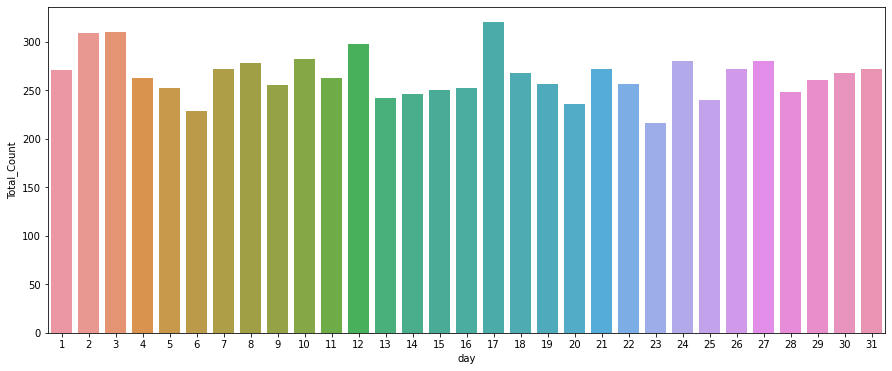

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x="day", y="Total_Count", data=day_amount)

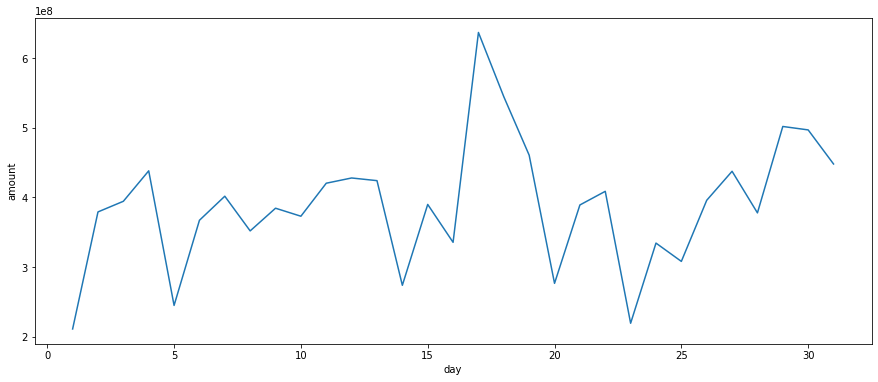

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x="day", y="amount", data=day_amount)

Maximum fraud transaction happened on 17th day.

## Understanding 'isFlaggedFraud'

In [ ]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [ ]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1,9
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1,11
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1,12
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1,17
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1,18
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1,18
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1,24
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1,25
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1,26
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1,27


In [ ]:
pd.crosstab(df['isFraud'], df['isFlaggedFraud'])

isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


In the current scenario, among 8213 fraud transactions model detects only 16 (all of 'TRANSFER' type). Altough non-fraud transactions are flagged correctly by the model, but it has failed to flag most of the fraudulent transactions.

## Understanding 'isFraud'

Text(0.5, 1.0, 'Transactions Fraud vs NonFraud')

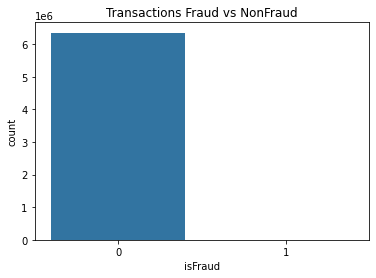

In [ ]:
sns.countplot(df['isFraud'])
plt.title('Transactions Fraud vs NonFraud')

In [ ]:
df['isFraud'].value_counts(normalize=True)*100

0    99.870918
1     0.129082
Name: isFraud, dtype: float64

Clearly shows we have an imbalanced target. Majority of the transactions are non fraud.

## Understanding 'Type'

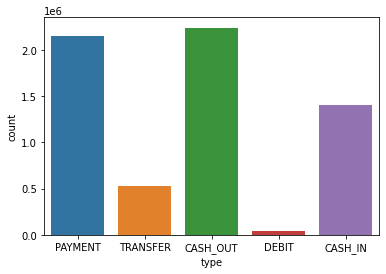

In [ ]:
sns.countplot(df['type'])

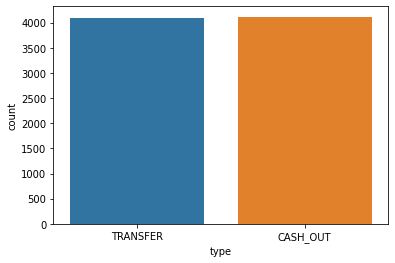

In [ ]:
sns.countplot(df_fraud['type'])

Fraud only occurs in 'TRANSFER' or 'CASH_OUT' mode.

## Understanding Amount

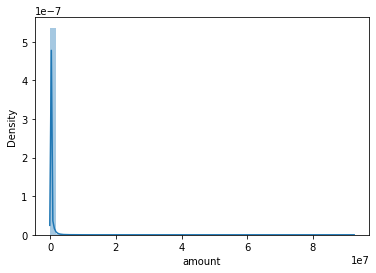

In [ ]:
sns.distplot(df['amount'])

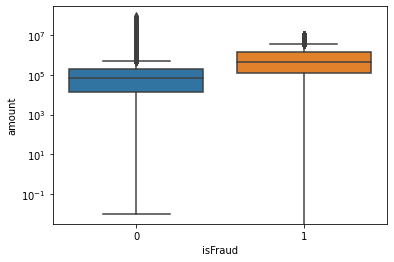

In [ ]:
box = sns.boxplot(df['isFraud'], df['amount'])
box.set_yscale('log')

## Understanding Transaction Type Names

In [ ]:
#run
df.loc[df['nameOrig'].str.contains('C') & df['nameDest'].str.contains('C'), "nameType"] = 'CC'
df.loc[df['nameOrig'].str.contains('C') & df['nameDest'].str.contains('M'), "nameType"] = 'CM'

In [ ]:
df.sample(n=5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day,nameType
1738118,161,CASH_IN,509993.18,C674385421,24296187.52,24806180.69,C478791436,1156214.18,646221.01,0,0,7,CC
1679748,159,TRANSFER,610110.98,C181012041,0.00,0.00,C1335178462,640184.81,1250295.80,0,0,7,CC
614911,34,CASH_OUT,32000.40,C383553344,0.00,0.00,C1615311108,283380.98,360594.27,0,0,2,CC
3883386,283,CASH_IN,82620.45,C64368796,2419408.06,2502028.51,C303187435,839922.97,757302.51,0,0,12,CC
3013683,232,PAYMENT,24933.83,C1429287794,0.00,0.00,M830680684,0.00,0.00,0,0,10,CM


In [ ]:
df['nameType'].value_counts()

CC    4211125
CM    2151495
Name: nameType, dtype: int64

In [ ]:
df_fraud = df[df['isFraud']==1]

In [ ]:
df_fraud['nameType'].value_counts()

CC    8213
Name: nameType, dtype: int64

Transactions are 2 types - CC (Customer to Customer) and CM (Customer to Merchant). Fraud transactions occur only when the transaction type is CC.

## Understanding Balance Originating

In [ ]:
#run
df.loc[df['type']=='CASH_IN','trueNewBalanceOrig'] = df.loc[df['type']=='CASH_IN','oldbalanceOrg'] + df.loc[df['type']=='CASH_IN','amount']
df.loc[df['type']!='CASH_IN','trueNewBalanceOrig'] = df.loc[df['type']!='CASH_IN','oldbalanceOrg'] - df.loc[df['type']!='CASH_IN','amount']

In [ ]:
#run
df['newBalOrigFlag'] = df['trueNewBalanceOrig'] != df['newbalanceOrig']
df.sample(n=5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day,nameType,trueNewBalanceOrig,newBalOrigFlag
51501,9,CASH_OUT,79942.91,C183901119,189.0,0.00,C2113587938,60119.00,140061.91,0,0,1,CC,-79753.91,True
2848917,227,TRANSFER,2142766.38,C1105139872,0.0,0.00,C1670805591,2577350.36,4720116.73,0,0,10,CC,-2142766.38,True
1444785,140,PAYMENT,7919.94,C90706755,46874.0,38954.06,M1322525957,0.00,0.00,0,0,6,CM,38954.06,False
3509155,259,PAYMENT,7140.32,C730102147,3469.0,0.00,M623661301,0.00,0.00,0,0,11,CM,-3671.32,True
533644,21,PAYMENT,887.29,C1513580173,13832.0,12944.71,M1097162038,0.00,0.00,0,0,1,CM,12944.71,False


In [ ]:
df['newBalOrigFlag'].value_counts()

True     4419954
False    1942666
Name: newBalOrigFlag, dtype: int64

In [ ]:
pd.crosstab(df['isFraud'], df['newBalOrigFlag'])

newBalOrigFlag,False,True
isFraud,,
0,1934580,4419827
1,8086,127


True represents here is some mismatch among the newbalanceOrig and trueNewBalanceOrig. Among Fraud transactions, 127 rows have mismatch values.

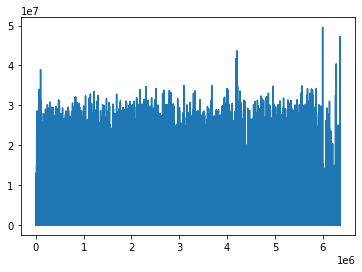

In [ ]:
df['newbalanceOrig'].plot.line()

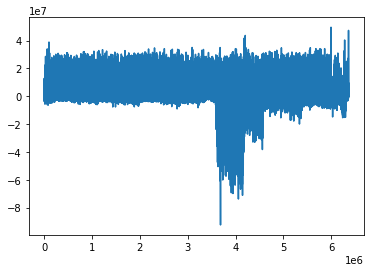

In [ ]:
df['trueNewBalanceOrig'].plot.line()

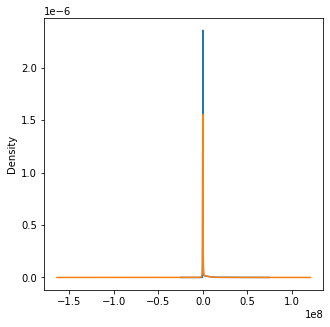

In [ ]:
plt.figure(figsize=(5,5))
df['newbalanceOrig'].plot(kind='density')
df['trueNewBalanceOrig'].plot(kind='density')

newbalanceOrig has a higher peak compared to trueNewBalanceOrig.

## Understanding Balance Destination

In [ ]:
#run
df.loc[df['type']=='CASH_IN','trueNewBalanceDest'] = df.loc[df['type']=='CASH_IN','oldbalanceDest'] - df.loc[df['type']=='CASH_IN','amount']
df.loc[df['type']!='CASH_IN','trueNewBalanceDest'] = df.loc[df['type']!='CASH_IN','oldbalanceDest'] + df.loc[df['type']!='CASH_IN','amount']

In [ ]:
#run
df['newBalDestFlag'] = df['trueNewBalanceDest'] != df['newbalanceDest']
df.sample(n=5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day,nameType,trueNewBalanceOrig,newBalOrigFlag,trueNewBalanceDest,newBalDestFlag
2869280,227,CASH_IN,352654.00,C1207461330,462.0,353116.00,C1299474402,143214.61,0.0,0,0,10,CC,353116.00,False,-209439.39,True
2145540,184,CASH_IN,58839.04,C991407642,99287.0,158126.04,C220540965,0.00,0.0,0,0,8,CC,158126.04,False,-58839.04,True
5025475,353,CASH_OUT,35272.32,C680489357,33559.0,0.00,C325413976,352666.58,387938.9,0,0,15,CC,-1713.32,True,387938.90,False
5498488,380,PAYMENT,17409.51,C1674180574,53071.0,35661.49,M722090624,0.00,0.0,0,0,16,CM,35661.49,True,17409.51,True
642305,35,CASH_OUT,123666.32,C2102252099,9955.0,0.00,C1186861498,27434.11,152149.3,0,0,2,CC,-113711.32,True,151100.43,True


In [ ]:
df['newBalDestFlag'].value_counts()

True     4264129
False    2098491
Name: newBalDestFlag, dtype: int64

In [ ]:
pd.crosstab(df['isFraud'], df['newBalDestFlag'])

newBalDestFlag,False,True
isFraud,,
0,2095602,4258805
1,2889,5324


True represents here is some mismatch among the newbalanceDest and trueNewBalanceDest. Among Fraud transactions, 5324 rows have mismatch values.

## Label Encoding

In [60]:
#run
from sklearn.preprocessing import LabelEncoder

df1 = df.copy()
le = LabelEncoder()
df1['type'] = le.fit_transform(df1['type'])

In [61]:
#run
df1['nameType'] = le.fit_transform(df1['nameType'])
df1.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day,nameType,trueNewBalanceOrig,newBalOrigFlag,trueNewBalanceDest,newBalDestFlag
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,1,160296.36,False,9839.64,True
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,1,19384.72,False,1864.28,True
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,0,0.00,False,181.00,True
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0.00,False,21363.00,True
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,1,29885.86,False,11668.14,True


Performed Label Encoding on 'type' and 'nameType'.

## Checking Correlation

In [62]:
#run
df1 = df1.drop(columns=['isFlaggedFraud', 'nameOrig', 'nameDest', 'step', 'newBalOrigFlag', 'newBalDestFlag'], axis = 1)
df1.head() 

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,day,nameType,trueNewBalanceOrig,trueNewBalanceDest
0,3,9839.64,170136.0,160296.36,0.0,0.0,0,1,1,160296.36,9839.64
1,3,1864.28,21249.0,19384.72,0.0,0.0,0,1,1,19384.72,1864.28
2,4,181.00,181.0,0.00,0.0,0.0,1,1,0,0.00,181.00
3,1,181.00,181.0,0.00,21182.0,0.0,1,1,0,0.00,21363.00
4,3,11668.14,41554.0,29885.86,0.0,0.0,0,1,1,29885.86,11668.14


In [ ]:
corr_train = df1.corr()['isFraud']
print(corr_train.sort_values())

nameType             -0.025697
newbalanceOrig       -0.008148
trueNewBalanceOrig   -0.006507
oldbalanceDest       -0.005885
newbalanceDest        0.000535
trueNewBalanceDest    0.008020
oldbalanceOrg         0.010154
type                  0.020833
amount                0.076688
isFraud               1.000000
Name: isFraud, dtype: float64


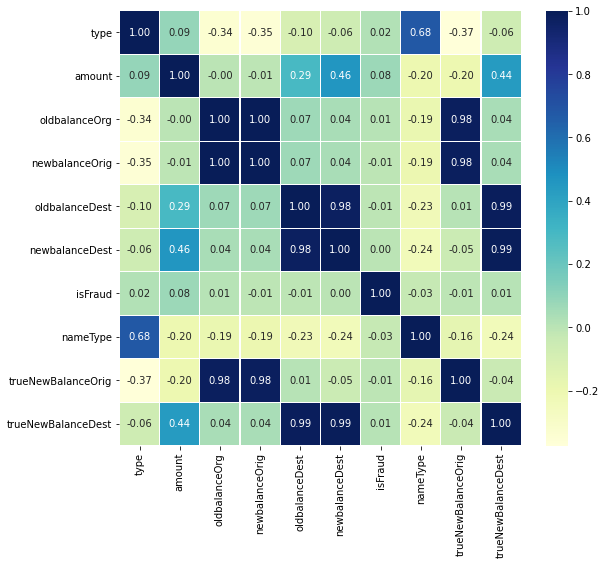

In [ ]:
corrmat = df1.corr() 

f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True, fmt='.2f') 

## Model Building

In [63]:
# Splitting into 80% train and 20% test

from sklearn.model_selection import train_test_split

X = df1.drop(columns=['isFraud'], axis=1)
y = df1['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [64]:
# Train model

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
# Applying model to test data

y_preds = model.predict(X_test)

In [66]:
# Checking Actual vs Predicted values

act_vs_pred = pd.DataFrame({'Actual': y_test, 'Prediction': y_preds})
act_vs_pred.sample(10)

,Actual,Prediction
877785,0,0
4447880,0,0
330018,0,0
1738824,0,0
6074043,0,0
50758,0,0
4671480,0,0
6328658,0,0
3084727,0,0
4442467,0,0


In [67]:
# Finding classification metrics for model

from sklearn.metrics import classification_report

print('Classification metrics: \n', classification_report(y_test, y_preds))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.99      1.00      0.99      1641

    accuracy                           1.00   1272524
   macro avg       0.99      1.00      1.00   1272524
weighted avg       1.00      1.00      1.00   1272524



In [69]:
from sklearn.metrics import accuracy_score

print('Accuracy Score: ', accuracy_score(y_test, y_preds)*100)

Accuracy Score:  99.99819256847022


Text(0.5, 0, 'Feature Importance Score')

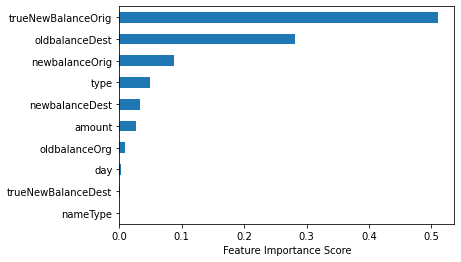

In [ ]:
# Checking which feature was more important for our model

vars = ['day','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','nameType','trueNewBalanceOrig','trueNewBalanceDest']
feat_imp = pd.Series(model.feature_importances_, vars).sort_values()
feat_imp.plot(kind='barh')
plt.xlabel('Feature Importance Score')